# HOW TO DETEERMINE THE VALUE OF K(no. of clusters)??
 ans- after taking cluster of two let say we have to calculate the sum of squared 

 BUt as the no. of K increases the SSE tends to decrease so what value of K     should we choose????
 
 Find out the elbow in the graph of K and SSE 
 
 understanding X in K means X(no. of training example, no. of feature )
 no. of feature defines the dimensions in k means algo.

 WHILE THE CLUSTERS IN K MEANS ALGO ARE MADE FROM DIFFERENT TRAINING EXAMPLES 
  so here we took centroid as centroids=np.zeros((self.K, self.num_features))
    
    1) initialize the random centroids to each cluster 

        2) take each sample and find the distance between sample and centroids 
        3) then assign the minimum distance centroid to that sample 

        4) do it for the whole sample

        5) find the mean distance of each sample from their centroid 

        6) then update the centroid to the mean distance 

     then again repeat from step 2 


Termination criteria satisfied, K means has conversed


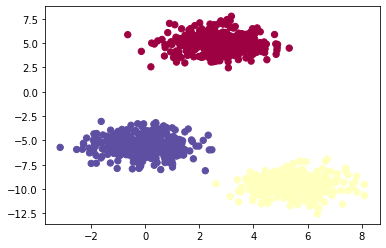

In [26]:
# HOW TO DETEERMINE THE VALUE OF K(no. of clusters)??
# ans- after taking cluster of two let say we have to calculate the sum of squared 
#error 
# BUt as the no. of K increases the SSE tends to decrease so what value of K should we choose????
# Find out the elbow in the graph of K and SSE 


import numpy as np

import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
#K means clustering 
class Kmeansclustering():
    
    def __init__(self,X,num_clusters):
        
        self.K=num_clusters
        self.max_iterations=100
        self.num_example, self.num_features =X.shape
        
    def initialize_random_centroids(self, X):
        
        centroids=np.zeros((self.K, self.num_features))
        # clustering each features 
        # for k in range num_clusters 
                           
        for k in range(self.K):
            # assignoing centroid a random point of an example
            # if the ith example is 2D then assigning 2D centroids
            centroid=X[np.random.choice(range(self.num_example))]
            centroids[k]=centroid
            
        return centroids

            
    def create_clusters(self,X,centroids):
        clusters=[[] for _ in range(self.K)]
        for point_index, point in enumerate(X):
            closest_centroid= np.argmin(np.sqrt(np.sum((point- centroids)**2, axis=1)))
            
            
            #euclidean_distrance(x1, x2):
            #eucledian distance between two vectors x1 and x2
            '''return np.sqrt(np.sum((x1-x2)**2))'''
            clusters[closest_centroid].append(point_index)
        return clusters 
                           
    def calculate_new_centroids(self, clusters,X):
        centroids=np.zeros((self.K,self.num_features))
        
        for idx, cluster in enumerate(clusters):
            new_centroid=np.mean(X[cluster], axis=0)
            centroids[idx]= new_centroid
        return centroids
            
        
    def predict_cluster(self,clusters,X):
        y_pred=np.zeros(self.num_example)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx]=cluster_idx
                
        return y_pred

    def plot_fig(self,X,y):
        plt.scatter(X[:,0], X[:,1], c=y,s=40, cmap=plt.cm.Spectral)
        plt.show()
        
    def fit(self,X):
        centroids= self.initialize_random_centroids(X)
        
        for i in range(self.max_iterations):
            clusters=self.create_clusters(X,centroids)
            
            prev_centroids=centroids
            centroids=self.calculate_new_centroids(clusters, X)
            diff= centroids- prev_centroids 
            
            if not diff.any():
                print("Termination criteria satisfied, K means has conversed")
                break 
        y_pred=self.predict_cluster(clusters, X)

        self.plot_fig(X,y_pred)
        return y_pred
    
    
if __name__=='__main__':
    np.random.seed(10)
    num_clusters= 3
    X,_=make_blobs(n_samples=1000, n_features=2, centers=num_clusters)
    
    KMeans=Kmeansclustering(X,num_clusters)
    y_pred=KMeans.fit(X)
    